In [13]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
from seaborn import set_style

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_selection import SelectFromModel

## This sets the plot style
## to have a grid on a white background
set_style("whitegrid")

## Random forest for feature importances

Random forests can also provide feature importance scores. 

The `sklearn` algorithm measures importance in the following way. For each feature it looks at every tree and identifies the nodes using that feature to make a cut. It then measures how much those cuts reduced impurity and averages that value over all the trees in the forest. After getting the average impurity reduction for each feature, `sklearn` scales the results so that the sum of all feature importances is equal to $1$.

We will demonstrate this on the `iris` data set.

In [2]:
## import model objects
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
# load the data
data_train = pd.read_csv('SVM/midFeaturesTrainFinalWithChars.csv')
#data_test = pd.read_csv('Feature Extraction/midFeaturesTestSetWithChars.csv')


data_train.head()

,FileID,actorID,Emotion,SentenceID,Age,Sex,Race,Ethnicity,zcr_mean,energy_mean,...,delta chroma_4_std,delta chroma_5_std,delta chroma_6_std,delta chroma_7_std,delta chroma_8_std,delta chroma_9_std,delta chroma_10_std,delta chroma_11_std,delta chroma_12_std,delta chroma_std_std
0,1001_DFA_ANG_XX,1001,ANG,DFA,51,Male,Caucasian,Not Hispanic,0.159956,0.012981,...,0.024107,0.014803,0.017961,0.013412,0.008655,0.010352,0.009738,0.010600,0.004328,0.009167
1,1001_DFA_DIS_XX,1001,DIS,DFA,51,Male,Caucasian,Not Hispanic,0.175069,0.006502,...,0.022395,0.015510,0.008768,0.014533,0.009661,0.002533,0.004223,0.007513,0.003662,0.007296
2,1001_DFA_FEA_XX,1001,FEA,DFA,51,Male,Caucasian,Not Hispanic,0.199849,0.016796,...,0.007043,0.003129,0.006915,0.007791,0.013899,0.005247,0.003474,0.014306,0.005781,0.008250
3,1001_DFA_HAP_XX,1001,HAP,DFA,51,Male,Caucasian,Not Hispanic,0.148663,0.007960,...,0.021737,0.005675,0.009277,0.026797,0.010147,0.010658,0.017229,0.013203,0.010011,0.007488
4,1001_DFA_NEU_XX,1001,NEU,DFA,51,Male,Caucasian,Not Hispanic,0.174283,0.010704,...,0.031970,0.012929,0.017969,0.037496,0.013379,0.008354,0.005615,0.008907,0.007483,0.013592


In [4]:
# Removing actor characteristics
data = data_train.drop(columns = ['FileID', 'actorID', 'SentenceID', 'Age', 'Sex', 'Race', 'Ethnicity' ])
#X_test = data_test.drop(columns = ['FileID', 'ActorID', 'SentenceID', 'Age', 'Sex', 'Race', 'Ethnicity' ])

data.head()

,Emotion,zcr_mean,energy_mean,energy_entropy_mean,spectral_centroid_mean,spectral_spread_mean,spectral_entropy_mean,spectral_flux_mean,spectral_rolloff_mean,mfcc_1_mean,...,delta chroma_4_std,delta chroma_5_std,delta chroma_6_std,delta chroma_7_std,delta chroma_8_std,delta chroma_9_std,delta chroma_10_std,delta chroma_11_std,delta chroma_12_std,delta chroma_std_std
0,ANG,0.159956,0.012981,2.988679,0.250490,0.224054,1.342449,0.005193,0.296204,-26.682748,...,0.024107,0.014803,0.017961,0.013412,0.008655,0.010352,0.009738,0.010600,0.004328,0.009167
1,DIS,0.175069,0.006502,2.930843,0.258174,0.209151,1.423432,0.005544,0.302133,-30.412356,...,0.022395,0.015510,0.008768,0.014533,0.009661,0.002533,0.004223,0.007513,0.003662,0.007296
2,FEA,0.199849,0.016796,2.999322,0.272570,0.202443,1.399237,0.005088,0.305786,-30.992097,...,0.007043,0.003129,0.006915,0.007791,0.013899,0.005247,0.003474,0.014306,0.005781,0.008250
3,HAP,0.148663,0.007960,2.880264,0.235750,0.211387,1.292553,0.007223,0.263936,-31.139150,...,0.021737,0.005675,0.009277,0.026797,0.010147,0.010658,0.017229,0.013203,0.010011,0.007488
4,NEU,0.174283,0.010704,2.833565,0.256034,0.201942,1.413561,0.006594,0.297967,-29.823951,...,0.031970,0.012929,0.017969,0.037496,0.013379,0.008354,0.005615,0.008907,0.007483,0.013592


In [5]:
from sklearn.model_selection import train_test_split

In [15]:
#X = pd.DataFrame(data.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
#y = pd.DataFrame(data.target, columns=['Target'])
#data.all

In [6]:
#data1 = load_iris(as_frame=True)

X = data.drop(columns = ['Emotion'])

#X = X.rename(columns={'sepal length (cm)':'sepal_length',
#                         'sepal width (cm)':'sepal_width',
#                         'petal length (cm)':'petal_length',
#                         'petal width (cm)':'petal_width'})
y = data['Emotion']

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X.copy(), y.copy(),
                                                       shuffle=True,
                                                       random_state=153,
                                                       stratify=y,
                                                       test_size=.2)

-------------------
Depth: 2
-------------------


/home/MRGomez/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


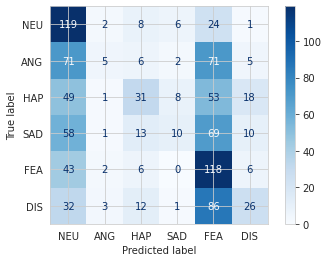

-------------------
Depth: 4
-------------------


/home/MRGomez/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


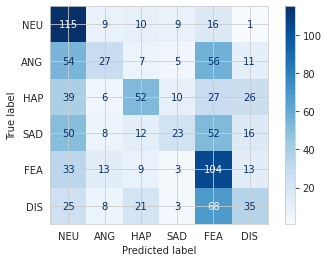

-------------------
Depth: 6
-------------------


/home/MRGomez/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


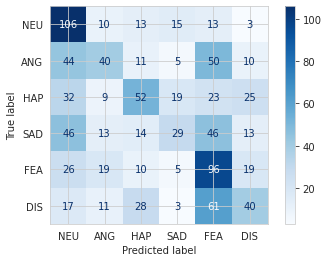

-------------------
Depth: 8
-------------------


/home/MRGomez/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


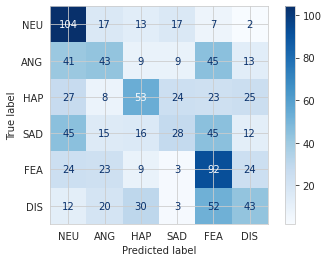

In [11]:
class_names = ["NEU", "ANG", "HAP", "SAD", "FEA", "DIS"]
Forests = []
for depth in range(2, 10, 2):
    forest = RandomForestClassifier(n_estimators=500, 
                                max_depth=depth,
                                random_state = 8973489)
    forest.fit(X_train, y_train)
    
    # Show confusion matrix
    print('-------------------')
    print('Depth: %i' %depth)
    print('-------------------')
    disp = plot_confusion_matrix(forest, X_val, y_val,
                                     display_labels=class_names,
                                     cmap=plt.cm.Blues)
    plt.show()
    
    # Most important features
    score_df = pd.DataFrame({'feature':X_train.columns,
                            'importance_score': forest.feature_importances_})

    score_df.sort_values('importance_score',ascending=False).head(10)
    
    # Save forest
    Forests.append(forest)

## Use only most important features

-------------------
Depth: 2
-------------------


/home/MRGomez/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


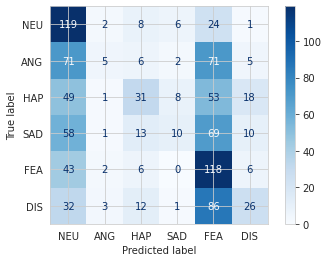

-------------------
Depth: 4
-------------------


/home/MRGomez/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


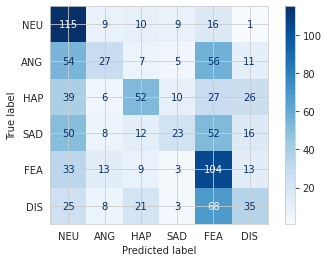

-------------------
Depth: 6
-------------------


/home/MRGomez/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


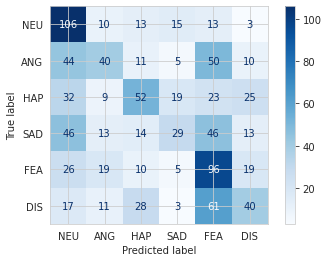

-------------------
Depth: 8
-------------------


/home/MRGomez/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


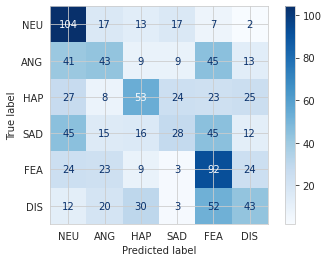

In [31]:
class_names = ["NEU", "ANG", "HAP", "SAD", "FEA", "DIS"]
SelForests = []
for depth in range(2, 10, 2):
    forest = RandomForestClassifier(n_estimators=500, 
                                max_depth=depth,
                                random_state = 8973489)
    forest.fit(X_train, y_train)
    
    sel = SelectFromModel(forest)
    sel.fit(X_train, y_train)

    # Show confusion matrix
    print('-------------------')
    print('Depth: %i' %depth)
    print('-------------------')
    # selected_feat= X_train.columns[(sel.get_support())]
    # selected_val = X_val.columns[(sel.get_support())]
    
    # disp = plot_confusion_matrix(forest, selected_val, y_val,
    disp = plot_confusion_matrix(forest, X_val, y_val,
                                     display_labels=class_names,
                                     cmap=plt.cm.Blues)
    plt.show()
    
    # Most important features
    score_df = pd.DataFrame({'feature':X_train.columns,
                            'importance_score': forest.feature_importances_})

    score_df.sort_values('importance_score',ascending=False).head(10)
    
    # Save forest
    SelForests.append(forest)


The important features

In [32]:
print('How many features:')
print(len(X_train.columns[sel.get_support()]))

print('Which features')
print(X_train.columns[sel.get_support()])

How many features:
42
Which features
Index(['energy_mean', 'energy_entropy_mean', 'spectral_centroid_mean',
       'spectral_spread_mean', 'spectral_entropy_mean', 'spectral_flux_mean',
       'spectral_rolloff_mean', 'mfcc_2_mean', 'mfcc_3_mean', 'mfcc_4_mean',
       'mfcc_5_mean', 'mfcc_7_mean', 'mfcc_9_mean', 'mfcc_10_mean',
       'chroma_7_mean', 'chroma_8_mean', 'chroma_std_mean',
       'delta energy_mean', 'delta mfcc_1_mean', 'energy_std',
       'spectral_centroid_std', 'spectral_entropy_std', 'spectral_flux_std',
       'mfcc_1_std', 'mfcc_2_std', 'mfcc_3_std', 'mfcc_6_std', 'mfcc_9_std',
       'mfcc_10_std', 'mfcc_11_std', 'mfcc_12_std', 'mfcc_13_std',
       'delta energy_std', 'delta spectral_centroid_std',
       'delta spectral_spread_std', 'delta spectral_flux_std',
       'delta mfcc_2_std', 'delta mfcc_3_std', 'delta mfcc_5_std',
       'delta mfcc_6_std', 'delta mfcc_7_std', 'delta mfcc_8_std'],
      dtype='object')


In [39]:
X_train.values.shape

(3900, 136)

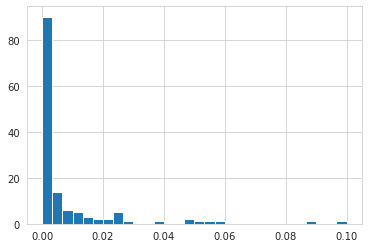

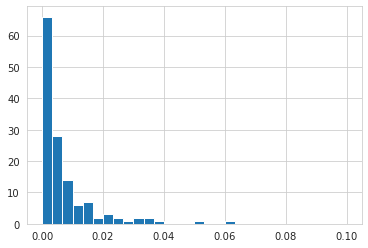

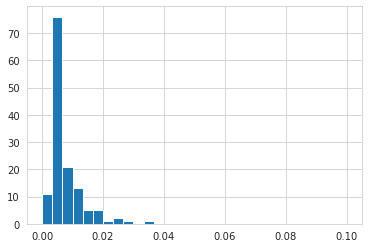

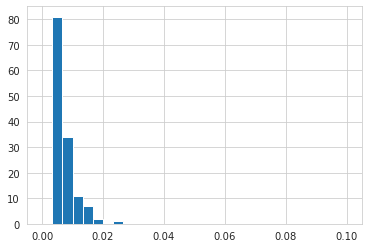

In [42]:
for model in SelForests:
    plt.figure()
    pd.Series(model.feature_importances_).hist(bins=30, range=[0,0.1])

In [67]:
#forest = RandomForestClassifier(n_estimators=500, 
#                                max_depth=2,
#                                random_state = 8973489)

forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=500, random_state=8973489)

The `sklearn` scaled impurity reduction can be found with `feature_importances_`.

In [68]:
forest.feature_importances_

array([0.00906836, 0.01145644, 0.01346571, 0.03796348, 0.02262834,
       0.05920154, 0.08834476, 0.02679594, 0.00290486, 0.0559249 ,
       0.00963309, 0.01358315, 0.00547269, 0.        , 0.00434978,
       0.        , 0.00637749, 0.00685613, 0.00142223, 0.00141667,
       0.        , 0.00040601, 0.00233407, 0.00554302, 0.        ,
       0.00077975, 0.00126254, 0.00619053, 0.01668656, 0.00419455,
       0.00045952, 0.00095057, 0.00137202, 0.0510644 , 0.        ,
       0.00339216, 0.00033504, 0.        , 0.00068792, 0.        ,
       0.        , 0.        , 0.00714819, 0.00056516, 0.00027001,
       0.        , 0.00035582, 0.        , 0.        , 0.        ,
       0.        , 0.00028665, 0.00031028, 0.        , 0.        ,
       0.00049135, 0.        , 0.00025488, 0.00069297, 0.        ,
       0.00103126, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00027474, 0.        , 0.00124376, 0.02566867,
       0.00091505, 0.00549897, 0.00101094, 0.00790801, 0.02456

We can make it a little more readable with a dataframe.

In [12]:
score_df = pd.DataFrame({'feature':X_train.columns,
                            'importance_score': forest.feature_importances_})
score_df.sort_values('importance_score',ascending=False).head(10)


,feature,importance_score
106,delta spectral_spread_std,0.023676
6,spectral_flux_mean,0.018503
88,mfcc_13_std,0.017906
5,spectral_entropy_mean,0.015929
69,energy_std,0.014612
33,chroma_std_mean,0.014359
9,mfcc_2_mean,0.014298
103,delta energy_std,0.014106
76,mfcc_1_std,0.013889
87,mfcc_12_std,0.013551


In [70]:
pred = forest.predict(X_val)

In [71]:
rf_confusion = confusion_matrix(y_val, pred)

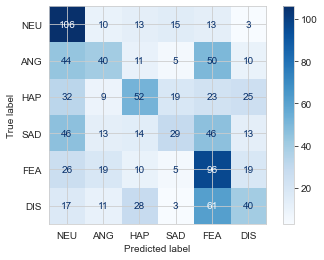

In [62]:
class_names = ["NEU", "ANG", "HAP", "SAD", "FEA", "DIS"]
disp = plot_confusion_matrix(forest, X_val, y_val,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
plt.show()

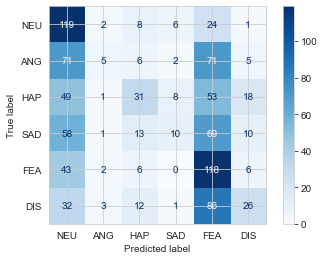

In [72]:
class_names = ["NEU", "ANG", "HAP", "SAD", "FEA", "DIS"]
disp = plot_confusion_matrix(forest, X_val, y_val,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
plt.show()

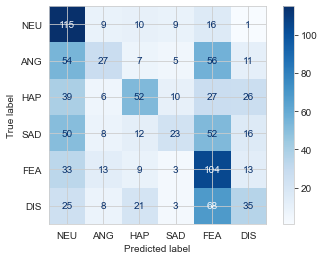

In [49]:
class_names = ["NEU", "ANG", "HAP", "SAD", "FEA", "DIS"]
disp = plot_confusion_matrix(forest, X_val, y_val,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
plt.show()

In [40]:
FP = rf_confusion.sum(axis=0) - np.diag(rf_confusion) 
FN = rf_confusion.sum(axis=1) - np.diag(rf_confusion)
TP = np.diag(rf_confusion)
TN = rf_confusion.sum() - (FP + FN + TP)

In [41]:
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

This is a nice feature of random forests, it allows us to understand what variables are most important, which can help us explain the algorithm. It is also useful as another method for feature selection.

##### Extra Trees

Extra trees classifiers also has the ability to be used for feature importance scores.

In [45]:
# We want an accuracy of 83+% for the classification to be meaningful
ACC

array([0.74795082, 0.81864754, 0.82889344, 0.82786885, 0.70286885,
       0.80327869])

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2022.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)